In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import os, sys

In [20]:
current_path = os.getcwd()
parent_dir = os.path.dirname(current_path)
sys.path.insert(0, parent_dir)

In [21]:
from scripts.stock_data_analysis import stock_moving_average, RSI_indicator, MACD_indicator
from scripts.visualize_stock_data import visualize_daily_return, visualize_MACD, visualize_RSI, visualize_MACD
from scripts.load_data import data_loader

In [22]:
amazon_data = data_loader('../dataset/AMZN_historical_data.csv')

In [23]:
amazon_data

,Date,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits
0,1997-05-15,0.121875,0.125000,0.096354,0.097917,0.097917,1443120000,0.0,0.0
1,1997-05-16,0.098438,0.098958,0.085417,0.086458,0.086458,294000000,0.0,0.0
2,1997-05-19,0.088021,0.088542,0.081250,0.085417,0.085417,122136000,0.0,0.0
3,1997-05-20,0.086458,0.087500,0.081771,0.081771,0.081771,109344000,0.0,0.0
4,1997-05-21,0.081771,0.082292,0.068750,0.071354,0.071354,377064000,0.0,0.0
...,...,...,...,...,...,...,...,...,...
6841,2024-07-24,183.199997,185.449997,180.410004,180.830002,180.830002,41532400,0.0,0.0
6842,2024-07-25,182.910004,183.899994,176.800003,179.850006,179.850006,44464200,0.0,0.0
6843,2024-07-26,180.389999,183.190002,180.240005,182.500000,182.500000,29506000,0.0,0.0
6844,2024-07-29,183.839996,184.750000,182.380005,183.199997,183.199997,33270100,0.0,0.0


In [25]:
amazon_data['moving_average'] = stock_moving_average(amazon_data['Close'],window=5)
amazon_data['RSI'] =  RSI_indicator(amazon_data['Close'], window= 5)
amazon_data['MACD'], amazon_data['MACD_signal'], amazon_data['MACD_hist']  = MACD_indicator(amazon_data['Close'])
amazon_data['Daily_Return'] = amazon_data['Adj Close'].pct_change()

In [28]:
amazon_data

,Date,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits,moving_average,RSI,MACD,MACD_signal,MACD_hist,Daily_Return
33,1997-07-02,0.075781,0.079688,0.075521,0.079427,0.079427,77640000,0.0,0.0,0.076458,69.987269,-0.000362,-0.000402,0.000040,0.048112
34,1997-07-03,0.079948,0.095833,0.079688,0.095573,0.095573,251544000,0.0,0.0,0.080469,91.048919,0.001149,-0.000092,0.001241,0.203281
35,1997-07-07,0.091667,0.101042,0.091667,0.100000,0.100000,161064000,0.0,0.0,0.085573,92.784381,0.002673,0.000461,0.002212,0.046321
36,1997-07-08,0.102083,0.116667,0.102083,0.115104,0.115104,310344000,0.0,0.0,0.093177,96.050261,0.005041,0.001377,0.003664,0.151040
37,1997-07-09,0.115104,0.119271,0.113542,0.116146,0.116146,165240000,0.0,0.0,0.101250,96.198633,0.006922,0.002486,0.004436,0.009053
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6841,2024-07-24,183.199997,185.449997,180.410004,180.830002,180.830002,41532400,0.0,0.0,183.334003,25.594844,-1.342010,0.635114,-1.977124,-0.029934
6842,2024-07-25,182.910004,183.899994,176.800003,179.850006,179.850006,44464200,0.0,0.0,182.554004,23.645847,-1.878483,0.132395,-2.010878,-0.005419
6843,2024-07-26,180.389999,183.190002,180.240005,182.500000,182.500000,29506000,0.0,0.0,182.428003,39.275613,-2.065994,-0.307283,-1.758711,0.014734
6844,2024-07-29,183.839996,184.750000,182.380005,183.199997,183.199997,33270100,0.0,0.0,182.558002,43.120112,-2.133520,-0.672530,-1.460990,0.003836


In [27]:
amazon_data.dropna(inplace=True)

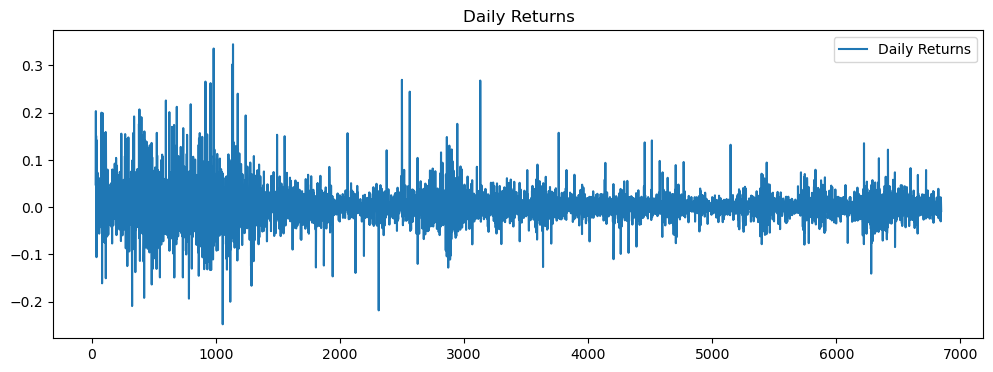

In [29]:
visualize_daily_return(amazon_data)

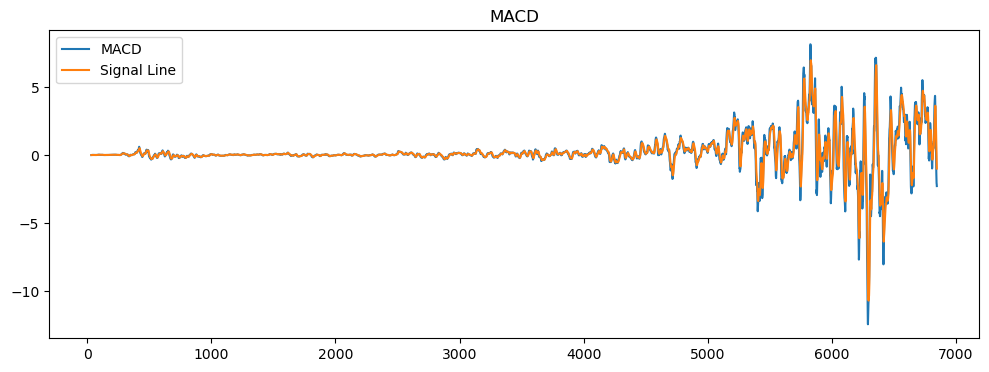

In [30]:
visualize_MACD(amazon_data)

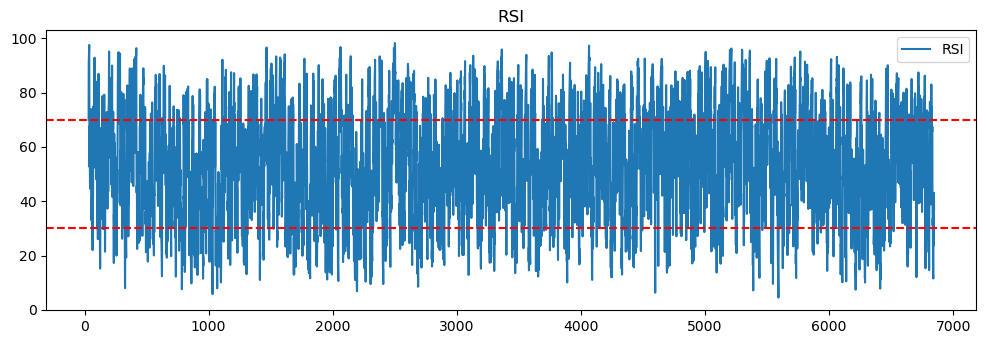

In [31]:
visualize_RSI(amazon_data)